In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

In [2]:
data = pd.read_csv('data.csv')
data.columns = ['hour','score']

In [3]:
data

,hour,score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
x_train = np.array(data.hour.values,dtype = np.float32)
y_train = np.array(data.score.values,dtype = np.float32)
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

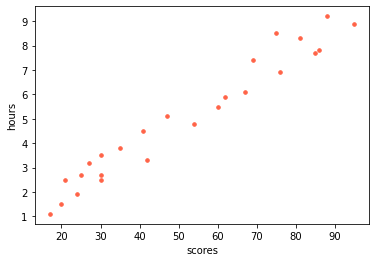

In [11]:
plt.scatter(data.score.values,data.hour.values,marker='.',s=50,c='Tomato')
plt.xlabel('scores')
plt.ylabel('hours')
plt.show()

In [12]:
class linearRegression(torch.nn.Module):
    def __init__(self,inputSize,outputSize):
        super(linearRegression,self).__init__()
        self.linear = torch.nn.Linear(inputSize,outputSize)

    def forward(self,x):
        out = self.linear(x)

        return out

In [13]:
inputDim = 1       
outputDim = 1       
learningRate = 0.001 
epochs = 1000

model = linearRegression(inputDim, outputDim)

In [14]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [15]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs,labels)

    loss.backward()
    optimizer.step()

    print(f'epoch:{epoch} loss:{loss.item()}')

312
epoch:405 loss:28.88825035095215
epoch:406 loss:28.888246536254883
epoch:407 loss:28.88824462890625
epoch:408 loss:28.888235092163086
epoch:409 loss:28.88823890686035
epoch:410 loss:28.888227462768555
epoch:411 loss:28.888233184814453
epoch:412 loss:28.888221740722656
epoch:413 loss:28.888229370117188
epoch:414 loss:28.888216018676758
epoch:415 loss:28.88821029663086
epoch:416 loss:28.888208389282227
epoch:417 loss:28.888208389282227
epoch:418 loss:28.888195037841797
epoch:419 loss:28.888195037841797
epoch:420 loss:28.8881893157959
epoch:421 loss:28.888193130493164
epoch:422 loss:28.88818359375
epoch:423 loss:28.8881778717041
epoch:424 loss:28.888172149658203
epoch:425 loss:28.888174057006836
epoch:426 loss:28.888166427612305
epoch:427 loss:28.888164520263672
epoch:428 loss:28.888154983520508
epoch:429 loss:28.888151168823242
epoch:430 loss:28.88814926147461
epoch:431 loss:28.88814926147461
epoch:432 loss:28.888151168823242
epoch:433 loss:28.888134002685547
epoch:434 loss:28.888132

In [16]:
with torch.no_grad():
    preds = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(preds)

[[26.843395]
 [52.316612]
 [33.701572]
 [85.62775 ]
 [36.640785]
 [17.046005]
 [92.485916]
 [56.23557 ]
 [83.66827 ]
 [28.802876]
 [77.78983 ]
 [60.154526]
 [46.43818 ]
 [34.68131 ]
 [13.127049]
 [89.5467  ]
 [26.843395]
 [20.964962]
 [62.114002]
 [74.85062 ]
 [28.802876]
 [49.377396]
 [39.58    ]
 [69.95192 ]
 [78.76958 ]]


In [17]:
pred_data = pd.DataFrame({'hour':data.hour.values.flatten(),'pred_score':preds.flatten()})
pred_data.head()

,hour,pred_score
0,2.5,26.843395
1,5.1,52.316612
2,3.2,33.701572
3,8.5,85.627747
4,3.5,36.640785


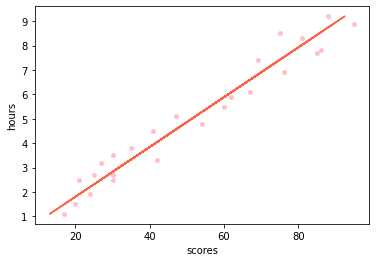

In [20]:
plt.scatter(data.score,data.hour,marker='.',s=60,c='pink')
plt.plot(pred_data.pred_score,pred_data.hour,c='Tomato')
plt.xlabel('scores')
plt.ylabel('hours')
plt.show()

In [21]:
with torch.no_grad():
    pred_value_competition = model(Variable(torch.tensor([9.25])))
    print(pred_value_competition)

tensor([92.9758])


In [22]:
print(f'Predicted Value for 9.25 is {(pred_value_competition[0])}')

Predicted Value for 9.25 is 92.97579193115234
